In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.13.0


Import the Fashion MNIST dataset

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Since there are no class names for each of the classes yet, we give them a classname

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Let's explore the data to find out more about the amount of images the dataset has

In [15]:
train_images.shape

(60000, 28, 28)

There are 60000 images, each representated as 28 x 28 pixels. We also look at the labels in the training set.

In [16]:
len(train_labels)

60000

There are 60000 labels. 

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Each label is an integer between 0 and 9

Let's look at the test set now.

In [18]:
test_images.shape

(10000, 28, 28)

There are 10000 images in the test set, again each with images represented as 28 x 28 pixels.

In [19]:
len(test_labels)

10000

Each test set again has 10000 labels

# Preprocess the data

To get started with training the network, data must be preprocessed first

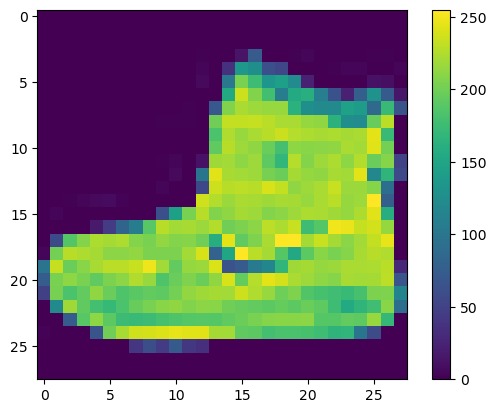

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The values fall in the range of 0 to 255. We only look at the first images now. We scale the values to a range of 0 to 1. So, divide by 255 (both the training and test set)

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Now let's look at the first 25 images

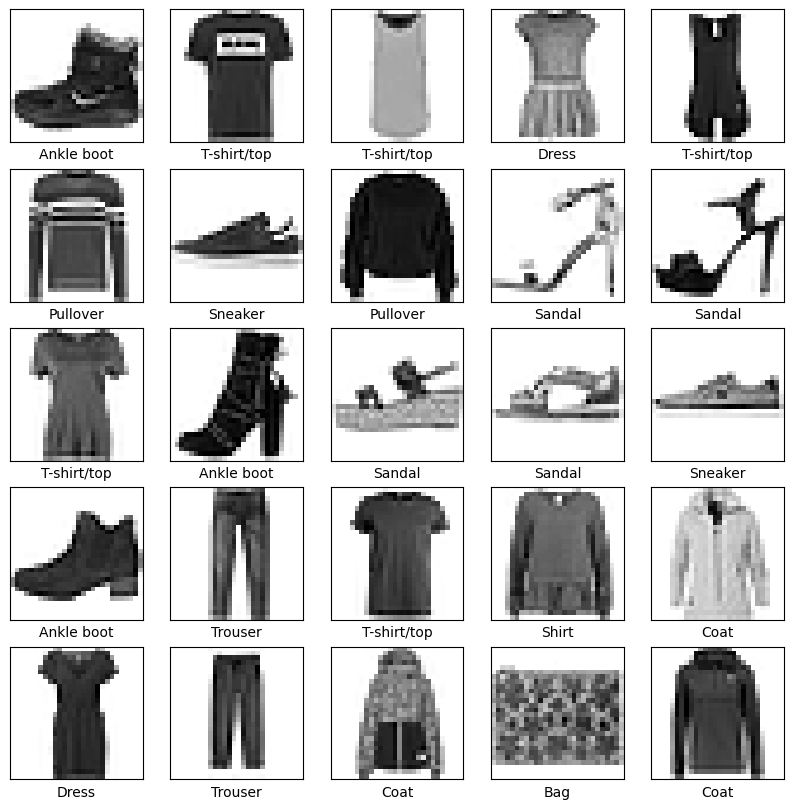

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Build the model 

Set up the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Optimizer — This is how the model is updated based on the data it sees and its loss function.
- Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2.  The model learns to associate images and labels.
3.  You ask the model to make predictions about a test set—in this example, the test_images array.
4.  Verify that the predictions match the labels from the test_labels array.

Feed the model <br>
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4980 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3342 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2560 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2444 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

Let's check how the model performs on the test dataset

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3422 - accuracy: 0.8821 - 538ms/epoch - 2ms/step

Test accuracy: 0.882099986076355


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

In [27]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 966us/step


In [28]:
predictions[0]

array([1.8361858e-07, 9.6150043e-10, 4.9458132e-10, 8.7740579e-09,
       1.2742769e-09, 3.3325140e-04, 1.6262019e-08, 1.2816622e-02,
       2.8244418e-07, 9.8684967e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [29]:
np.argmax(predictions[0])

9

The labels are:
- 0: T-shirt/top
- 1: Trouser 
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [30]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


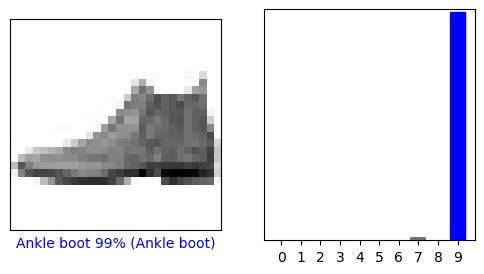

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

It guessed for 99% that it was an ankle boot, which is correct. 1% thought it was a sneaker.

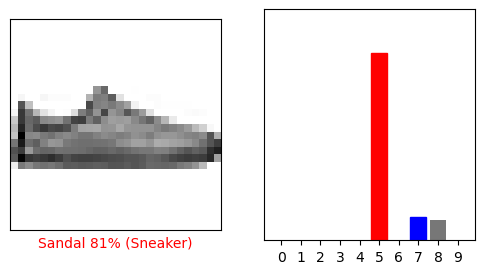

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

This one was hard to predict. 81% thought it was a sandal. A small percentage thought it was either sneaker (7) or a bag (8). The correct prediction is actually a sneaker.

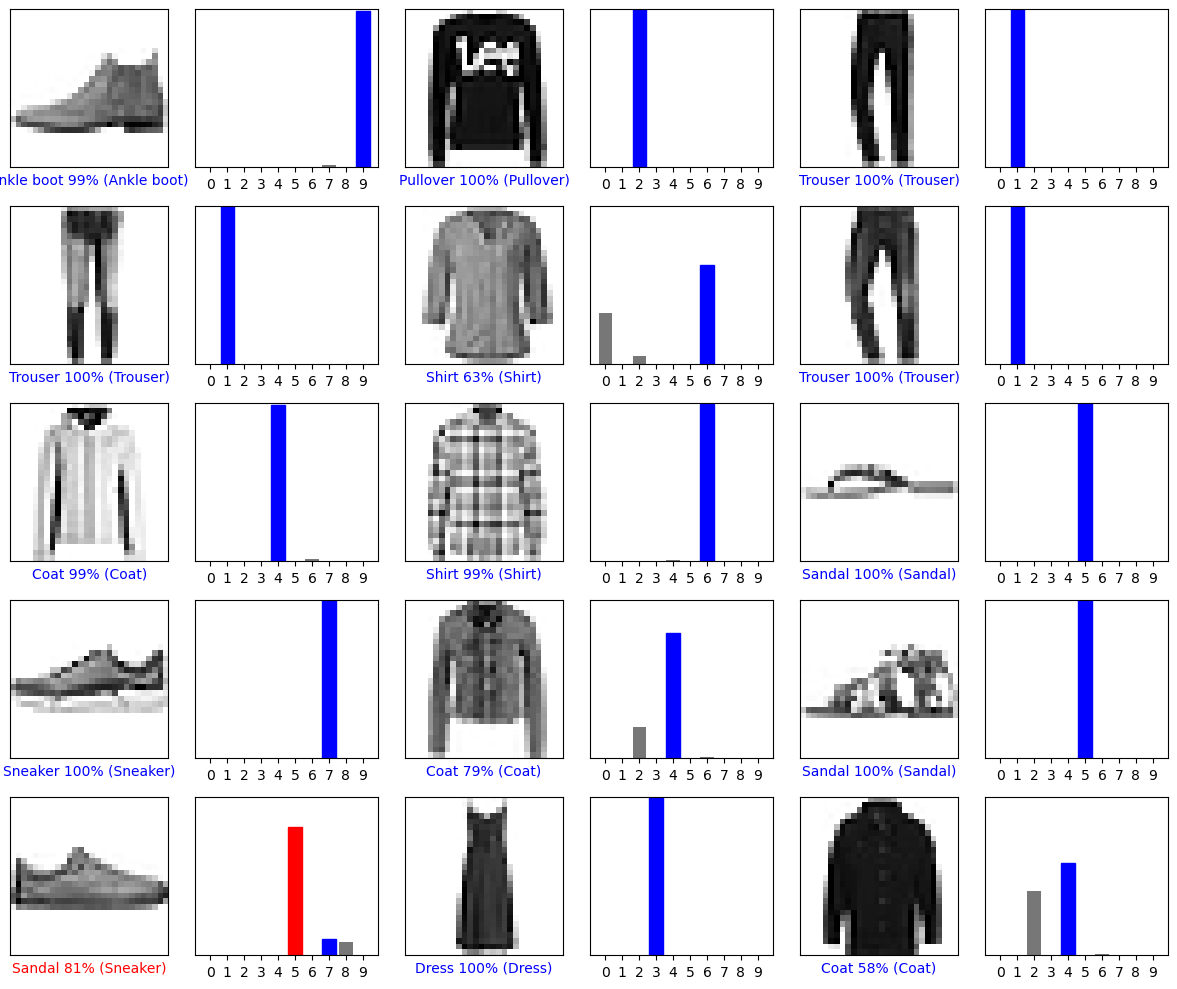

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use a trained model

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[2.05184697e-05 4.55819735e-13 9.98906255e-01 7.53018550e-11
  1.03929802e-03 1.62808467e-15 3.38937571e-05 8.11061912e-23
  1.03091834e-10 1.67596802e-14]]


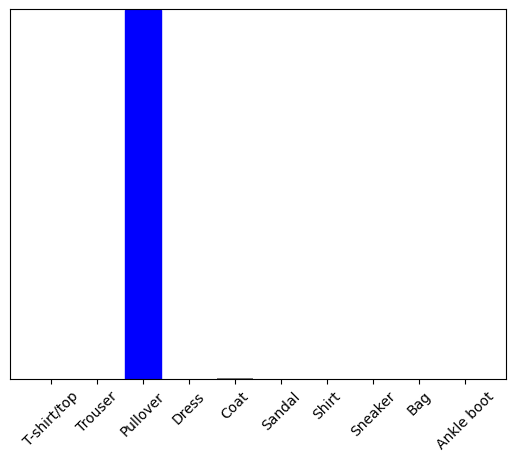

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [39]:
np.argmax(predictions_single[0])

2